In [1]:
!pip install autoscraper

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=609f7d52f1ab3df890e352cf666609bab1927e55617700264fa52ea9e42c964f
  Stored in directory: c:\users\kartik\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.corpus import stopwords
from autoscraper import AutoScraper
import re
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
    
%matplotlib inline

In [4]:
pos=pd.read_csv('positive-words.txt',sep='\n',  encoding='cp1252',header=None)
pos.iloc[30:40,:]

,0
30,; mistakes. They are included as these m...
31,; frequently in social media content.
32,;
33,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
34,a+
35,abound
36,abounds
37,abundance
38,abundant
39,accessable


In [5]:
pos[pos[0]=='a+'].index.values

array([34], dtype=int64)

In [6]:
pos.drop(range(0,35),axis=0,inplace=True)
pos.reset_index(inplace=True)

In [7]:
pos.drop(labels=['index'],axis=1,inplace=True)
pos.head()

,0
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [8]:
pos['Value']=np.ones(shape=(pos.shape[0]),dtype=int)
pos

,0,Value
0,abound,1
1,abounds,1
2,abundance,1
3,abundant,1
4,accessable,1
...,...,...
2000,youthful,1
2001,zeal,1
2002,zenith,1
2003,zest,1


In [9]:
neg=pd.read_csv('negative-words.txt',sep='\n',  encoding='cp1252',header=None , )
neg.head(5)

,0
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1,;
2,; Opinion Lexicon: Negative
3,;
4,; This file contains a list of NEGATIVE opinio...


In [10]:
neg[neg[0]=='2-faces'].index.values

array([35], dtype=int64)

In [11]:
neg.drop(range(0,36),axis=0,inplace=True)
neg.reset_index(inplace=True)

In [12]:
neg.drop(labels=['index'],axis=1,inplace=True)
neg.head()

,0
0,abnormal
1,abolish
2,abominable
3,abominably
4,abominate


In [13]:
neg['Value']=[-1 for i in range(0,neg.shape[0])]
neg

,0,Value
0,abnormal,-1
1,abolish,-1
2,abominable,-1
3,abominably,-1
4,abominate,-1
...,...,...
4776,zaps,-1
4777,zealot,-1
4778,zealous,-1
4779,zealously,-1


In [14]:
all_words = neg.append(pos)
all_words

,0,Value
0,abnormal,-1
1,abolish,-1
2,abominable,-1
3,abominably,-1
4,abominate,-1
...,...,...
2000,youthful,1
2001,zeal,1
2002,zenith,1
2003,zest,1


In [16]:
!pip install stopwords

In [18]:
!pip install numpy


In [22]:
nltk.download('stopword')

[nltk_data] Error loading stopword: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [23]:
from nltk.corpus import stopwords

In [26]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [27]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [28]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [29]:
url='https://www.excelr.com/testimonials'

In [30]:
wanted_list=['Productive Training with clear explanation could require more reading material. Overall good and useful training.']

In [31]:
scrap=AutoScraper()
result=scrap.build(url,wanted_list)
result

['Good',
 'Good and interactive',
 'Good Introduction and Interaction',
 'Good and Interactive',
 'Session was very interactive and knowledgeable.',
 'Very good teaching approach',
 'Great learning experience with trainer Aparna. Explained each topic with simple every day life examples. Thank you Aparna',
 'Great In-Depth and Interactive training delivery by the instructor. The pacing was also on point.',
 'Training was fantastic. The faculty, Mrs. Aparna, is well experienced, knowledgeable, and explained the modules with real-life examples. I could understand the subject by connecting the real-life examples explained in the training.',
 'It is good.',
 'It was good and helpful.',
 'Training is very good',
 'Excellent',
 'Training was good',
 'Very good session',
 'It was excellent, and I am looking forward to implementing it.',
 "I don't think it needs 2.5 days. It can be completed in 1.5 days. The pace of training is too slow and wastes valuable time. Content could also be made bette

In [45]:
len(result)

1619

In [46]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [47]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [48]:
iphone13_reviews

["\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 "\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 '\nHigh benefits with high price. I m in love with this device.\n',
 "\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 '\nHigh benefits with high price. I m in love with this device.\n',
 '\nSwitched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.Cons:1) The price. Got the 512GB pro max for 1.55 lac. and that is not at all value for the amount of money you spend. With no charger!2) Softwar

In [49]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone13_reviews)

In [50]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [51]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'high', 'benefits', 'with', 'high', 'price', 'i', 'm', 'in', 'love', 'with', 'this', 'device', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'high', 'benefits', 'with', 'high', 'price', 'i', 'm', 'in', 'love', 'with', 'this', 'device', 'switched', 'from', 'android', 'to', 'iphone', 'here', 'are', 'my', 'pros', 'and', 'cons', 'pros', 'the', 'battery', 'life', 'on', 'the', 'pro', 'max', 'is', 'just', 'excellent', 'no', 'android', 'with', 'even', 'a', 'mah', 'can', 'beat', 'it', 'it', 'is', 'that', 'well', 'optimised', 'the', 'camera', 'as', 'you', 'can', 'guess', 'is', 'one', 'of', 'the', 'best', 'if', 'not', 'the',

In [54]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [55]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [56]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

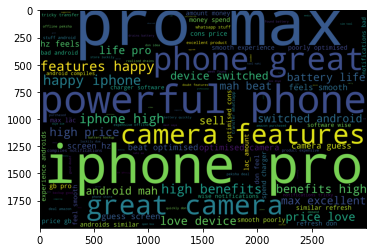

In [57]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [58]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [59]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

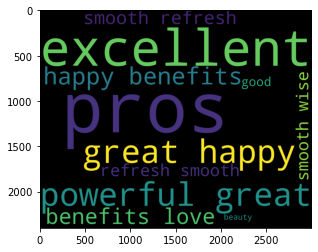

In [60]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [61]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [62]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

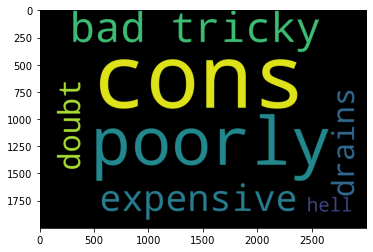

In [63]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)

# Here we get conclusion as Positive words are more used than negative words